In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

# run this command in anaconda prompt before continuing: python -m visdom.server &

C:\Users\Michael Mortensen\Desktop\simple-faster-rcnn-pytorch\model\utils\nms\non_maximum_suppression.py:12: UserWarning: 
    the python code for non_maximum_suppression is about 2x slow
    It is strongly recommended to build cython code: 
    `cd model/utils/nms/; python3 build.py build_ext --inplace
  `cd model/utils/nms/; python3 build.py build_ext --inplace''')


In [2]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


# Model trained with caffe pretrained model

Load test images and download the pretrained model and load it.

C:\Anaconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


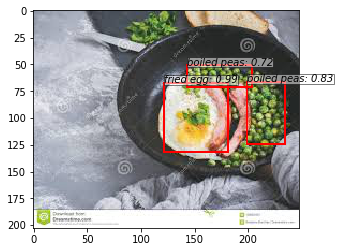

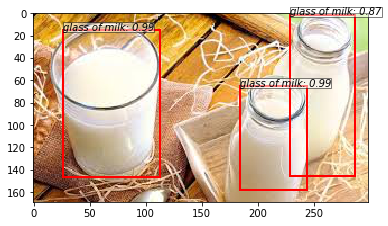

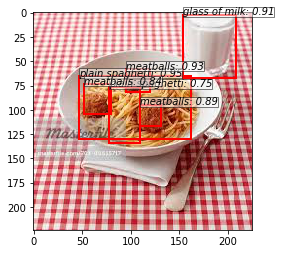

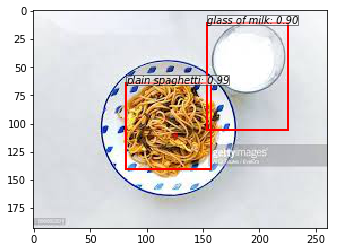

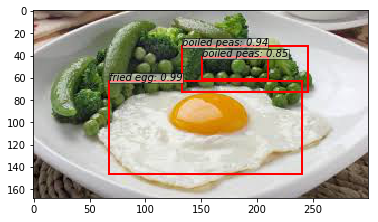

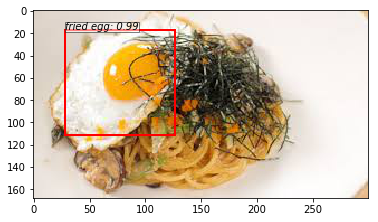

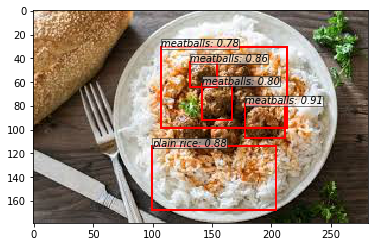

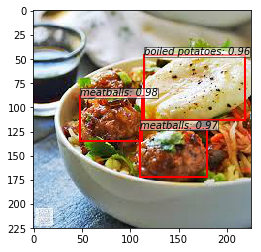

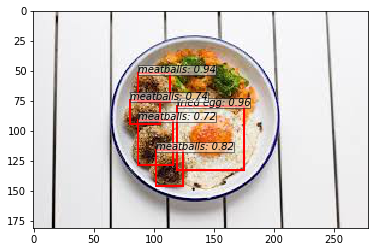

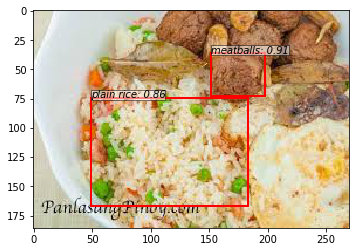

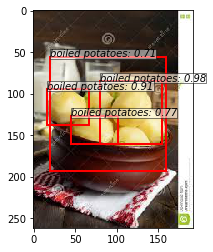

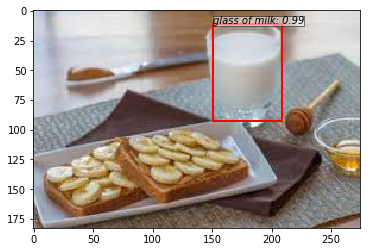

In [3]:
trainer.load('checkpoints\\fasterrcnn_12191035_0.594036314392')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model

imgs = []
imgsNames = [name for name in os.listdir('Demo_images') if os.path.isfile(os.path.join('Demo_images', name))]
for imgname in imgsNames:
    img = read_image('Demo_images\\' + imgname)
    img = t.from_numpy(img)[None]
    imgs.append(img)

for img in imgs:
    _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
    vis_bbox(at.tonumpy(img[0]),
             at.tonumpy(_bboxes[0]),
             at.tonumpy(_labels[0]).reshape(-1),
             at.tonumpy(_scores[0]).reshape(-1))

#print(at.tonumpy(_scores[0]).reshape(-1))